In [1]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as paths

0309_0105
0.08845669
0185_0102
0.043200035
0071_0107
0.08755591
0147_0101
0.103538066
0154_0105
0.07805589
0072_0107
0.08627417
0225_0104
0.103771865
0200_0106
0.09929135
0065_0101
0.0722666
0145_0101
0.116447
0113_0102
0.11346044
0205_0101
0.06299069
0207_0101
0.07951596
0083_0100
0.066422485
0156_0105
0.064734966
0325_0106
0.068498194
0186_0102
0.043810386
0079_0105
0.060761478
0063_0105
0.064667724
0310_0103
0.089524806
0309_0104
0.09074551
0064_0101
0.07507422
0108_0100
0.13595189
0194_0106
0.07808163
0195_0106
0.09498837
0150_0103
0.09517625
0190_0103
0.045061607
0148_0102
0.101523906
0195_0103
0.07481625
0163_0101
0.0582805
0310_0102
0.08665615
0192_0106
0.06463864
0317_0104
0.06666714
0185_0104
0.04641964
0192_0103
0.053270835
0150_0104
0.09462693
0148_0100
0.10286668
0078_0103
0.07849219
0064_0105
0.061020877
0066_0101
0.08526709
0104_0107
0.06591405
0146_0102
0.10286668
0225_0105
0.12022084
0327_0106
0.07374722
0312_0103
0.08036953
0074_0105
0.11651709
0479_0101
0.062799774
01

KeyboardInterrupt: 

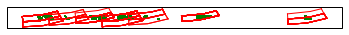

In [6]:
def plotPolygon(ax, polygon, color, linewidth=2):
    for i in range(1, len(polygon)):
        ax.plot([polygon[i - 1][0], polygon[i][0]],
                [polygon[i - 1][1], polygon[i][1]],
                color=color, linewidth=linewidth,
               transform = ccrs.Geodetic())

def plotData(plot_dict, metadata, axes):
    
    boundary = plot_dict["roi"][1]
    
    numLonPoints = 100j
    numLatPoints = 80j
    lon_grid, lat_grid = np.mgrid[boundary["minLon"]:boundary["maxLon"]:numLonPoints, 
                                  boundary["minLat"]:boundary["maxLat"]:numLatPoints]
    
    
    viird_poly = metadata[plot_dict["closest_viirs"]]["bounds"][:-1]
    
    
    plotPolygon(axes, plot_dict["roi"][0], "green", linewidth=1)
    plotPolygon(axes, metadata[plot_dict["closest_viirs"]]["bounds"], "red", linewidth=1)
    
    axes.pcolormesh(lon_grid, lat_grid, plot_dict["gridded_viirs"], transform=ccrs.PlateCarree(), vmax=5.0, vmin=0)
    
    
    

folder = "data/VIIRS-20200320/"
metadata = None
with open(folder + "metadata", "rb") as md_file:
    metadata = pickle.load(md_file)
    

fig, axes = plt.subplots(ncols=1, nrows=1, subplot_kw={'projection': ccrs.PlateCarree()})
for file in os.listdir(folder + "processed/"):
    plot_dict = None
    with open(folder + "processed/" + file, "rb") as datafile:
        plot_dict = pickle.load(datafile)
    print(file)
    print(plot_dict["merra_val"])
    plotData(plot_dict, metadata, axes)
    
fig.set_size_inches(22, 11)
plt.show()
        